In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
pd.set_option("display.max_columns", None) ## show all columns

In [2]:
from google.colab import drive
drive.mount('/drive')
df = pd.read_csv('/drive/MyDrive/Colab Notebooks/US_Accidents/Final_Data.csv')
df.head()

Mounted at /drive


,Severity,Distance(mi),State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Date,Time,Year,Month,Hours,Week,State_Name
0,3,3.230,OH,42.1,36.1,58.0,29.76,10.0,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016-02-08,00:37:08,2016,2,0.616667,Monday,Ohio
1,3,0.500,OH,37.0,29.8,93.0,29.69,10.0,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,2016-02-08,07:53:43,2016,2,7.883333,Monday,Ohio
2,2,1.427,OH,35.6,29.2,100.0,29.66,10.0,8.1,0.00,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Day,2016-02-08,08:16:57,2016,2,8.266667,Monday,Ohio
3,2,0.521,OH,33.1,30.0,92.0,29.63,0.5,3.5,0.08,Snow,False,False,False,False,True,False,False,False,False,False,False,False,Day,2016-02-08,11:51:46,2016,2,11.850000,Monday,Ohio
4,2,0.491,OH,39.0,31.8,70.0,29.59,10.0,11.5,0.00,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Day,2016-02-08,14:19:57,2016,2,14.316667,Monday,Ohio


# **Does visibility have any effect on the severity of an accident in US?**

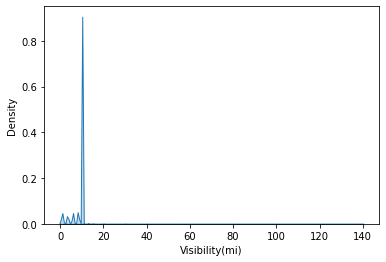

In [3]:
sns.kdeplot(data=df, x='Visibility(mi)', shade=True)   # Plotting the distribution

We can see that the distribution is not normal. The below probplots show that there are some data points which do not lie on the straight line.

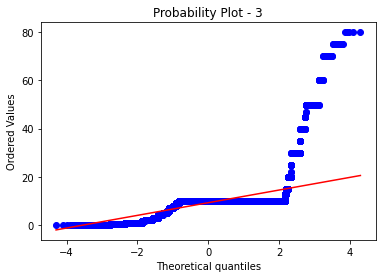

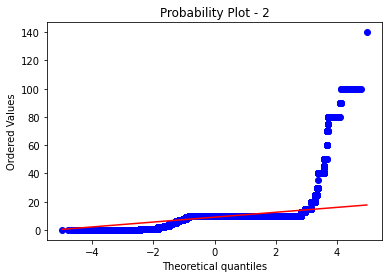

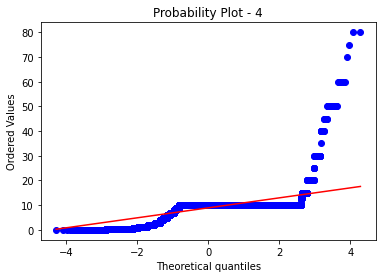

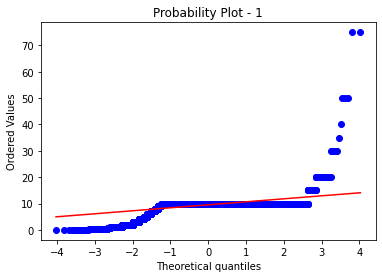

In [4]:
severity = df['Severity'].unique()
for s in severity:
    stats.probplot(df[df['Severity'] == s]['Visibility(mi)'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(s))
    plt.show()

Hypothesis Test for checking the normality of distribution.

Null (H0): Sample is Normal

Alternate (H1): Sample is not normal

In [5]:
w, p = stats.normaltest(df["Visibility(mi)"].values)
print(w, p)
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

1637780.4726508092 0.0
Sample does not look Gaussian (reject H0)


After checking the normality, it is clear that the distribution for the visibility does not look normal. Hence, we cannot apply ANOVA test here. We use Kruskal test which does not demand for the distribution to be normal.

H0: Distributions are same (Equal Mean, Mode)

H1: Distributions are not same (Different Mean, Mode)

In [6]:
s1 = df.query('Severity==1')['Visibility(mi)'].values
s2 = df.query('Severity==2')['Visibility(mi)'].values
s3 = df.query('Severity==3')['Visibility(mi)'].values
s4 = df.query('Severity==4')['Visibility(mi)'].values

stat, p = stats.kruskal(s1, s2, s3, s4)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=1315.690, p=0.000
Different distributions (reject H0)


From the hypothesis test, it is clear that atleast one of the severity class distribution is different from the other distributions. Hence, visibility does affect the severity of an accident.

## **Which measure is better for controlling the severity of an accident (Traffic Signal or Roundabout)?**


# **TRFFIC SIGNAL VS ROUNDABOUT**

In [7]:
signal = df.query("Traffic_Signal==True")["Severity"]
roundabout = df.query("Roundabout==True")["Severity"]

print('Signal: mean=%.3f stdv=%.3f' % (np.mean(signal), np.std(signal)))
print('Roundabout: mean=%.3f stdv=%.3f' % (np.mean(roundabout), np.std(roundabout)))

Signal: mean=2.075 stdv=0.499
Roundabout: mean=2.009 stdv=0.252


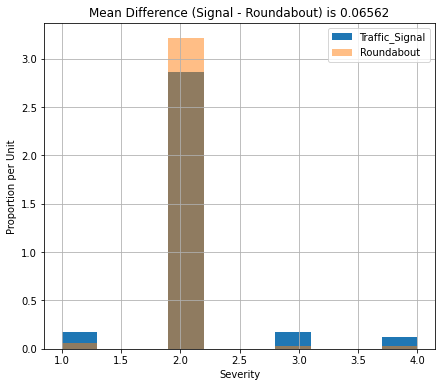

CPU times: user 261 ms, sys: 17.7 ms, total: 279 ms
Wall time: 269 ms


In [8]:
%%time
observed_difference = round(np.mean(signal) - np.mean(roundabout),5)
plt.figure(figsize=(7, 6))
signal.hist(density=True, alpha=1, label="Traffic_Signal")
roundabout.hist(density=True, alpha=0.5, label="Roundabout")
plt.xlabel("Severity")
plt.ylabel("Proportion per Unit")
plt.title(f"Mean Difference (Signal - Roundabout) is {observed_difference}")
plt.legend()
plt.show()

In [9]:
%%time
stat, p = stats.ttest_ind(signal, roundabout)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('No Difference in Mean (fail to reject H0)')
else:
	print('Difference in Mean (reject H0)')

Statistics=1.379, p=0.168
No Difference in Mean (fail to reject H0)
CPU times: user 3.65 ms, sys: 979 µs, total: 4.63 ms
Wall time: 4.74 ms


We can see that the p-value in our case is 0.168 it means we can't reject the null hypothesis. Hence, the test shows that there is no difference in the mean severity when both traffic signals and roundabout is present, meaning they are equally effective.